## **Mount on drive**

In [1]:
from google.colab import drive
drive.mount('/My-Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /My-Drive


In [2]:
%cd /My-Drive
import os
os.listdir()

/My-Drive


['.shortcut-targets-by-id', 'My Drive', '.Trash']

In [3]:
os.chdir('/My-Drive/My Drive/Titanic')
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'TitanicClassification.ipynb']

# **Import the libraries**

In [4]:
import pandas as pd #for structuring the data
import numpy as np #for mathematical manipulation of the data
import sklearn #for preprocessing and model building
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Load data into csv**

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_ID  916 non-null    int64  
 1   pclass        916 non-null    float64
 2   name          916 non-null    object 
 3   sex           916 non-null    object 
 4   age           729 non-null    float64
 5   sibsp         916 non-null    float64
 6   parch         916 non-null    float64
 7   ticket        916 non-null    object 
 8   fare          915 non-null    float64
 9   cabin         204 non-null    object 
 10  embarked      915 non-null    object 
 11  survived      916 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.0+ KB


# **feature Engineering/ feature insight**

In [84]:
train_data.head()

,passenger_ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1214,3.0,"Smiljanic, Mr. Mile",male,NaN,0.0,0.0,315037,8.6625,NaN,S,0
1,677,3.0,"Bostandyeff, Mr. Guentcho",male,26.0,0.0,0.0,349224,7.8958,NaN,S,0
2,534,2.0,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0.0,0.0,250655,26.0000,NaN,S,1
3,1174,3.0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,0
4,864,3.0,"Henriksson, Miss. Jenny Lovisa",female,28.0,0.0,0.0,347086,7.7750,NaN,S,0


In [85]:
train_data.describe()

,passenger_ID,pclass,age,sibsp,parch,fare,survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


let's drop unimportant features like: passenger_ID, name and cabin

In [0]:
dataTrain = train_data.drop(['passenger_ID', 'name', 'ticket','cabin'], axis = 1)
passengerid = test_data['passenger_ID']
dataTest= test_data.drop(['passenger_ID','name','ticket', 'cabin'], axis = 1)

In [87]:
dataTrain.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3.0,male,NaN,0.0,0.0,8.6625,S,0
1,3.0,male,26.0,0.0,0.0,7.8958,S,0
2,2.0,female,19.0,0.0,0.0,26.0000,S,1
3,3.0,female,NaN,8.0,2.0,69.5500,S,0
4,3.0,female,28.0,0.0,0.0,7.7750,S,0


In [88]:
dataTest.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3.0,male,35.0,0.0,0.0,7.1250,S
1,3.0,male,20.0,1.0,1.0,15.7417,C
2,3.0,male,NaN,0.0,0.0,7.8958,S
3,3.0,male,NaN,0.0,0.0,8.0500,S
4,3.0,male,NaN,0.0,0.0,7.7500,Q




## pclass visualization (insight) and transforrmation

In [89]:
dataTrain['pclass'].value_counts()

3.0    507
1.0    227
2.0    182
Name: pclass, dtype: int64

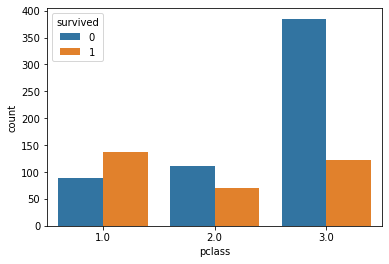

In [90]:
sns.countplot(x = 'pclass', hue = 'survived', data = dataTrain)

## sex visualization (insight) and transformation

In [91]:
dataTrain['sex'].value_counts()


male      592
female    324
Name: sex, dtype: int64

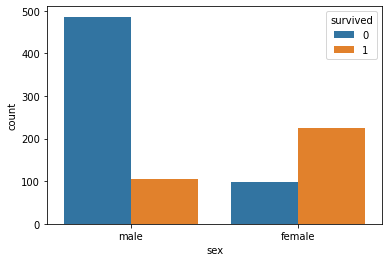

In [92]:
sns.countplot(x = 'sex', hue = 'survived', data = dataTrain)

In [93]:
dataTrain = pd.get_dummies(dataTrain, columns = ['sex']) #one hot encode the train data
dataTrain.head()

,pclass,age,sibsp,parch,fare,embarked,survived,sex_female,sex_male
0,3.0,NaN,0.0,0.0,8.6625,S,0,0,1
1,3.0,26.0,0.0,0.0,7.8958,S,0,0,1
2,2.0,19.0,0.0,0.0,26.0000,S,1,1,0
3,3.0,NaN,8.0,2.0,69.5500,S,0,1,0
4,3.0,28.0,0.0,0.0,7.7750,S,0,1,0


In [0]:
dataTest = pd.get_dummies(dataTest, columns = ['sex']) #one-hot encode the test data


## Age visualization (insight) and transformation

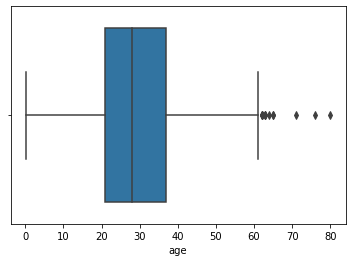

In [95]:
sns.boxplot(x = 'age', orient = 'horizontal', data = dataTrain)

In [96]:
agemean, agemedian, agemode = dataTrain['age'].mean(),dataTrain['age'].median(),dataTrain['age'].mode()[0]
print(agemean, agemedian, agemode)

29.102309053497944 28.0 24.0


In [0]:
dataTrain['age'].fillna(agemedian, inplace = True)

In [0]:
dataTest['age'].fillna(agemedian, inplace = True)

In [99]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    float64
 1   age         916 non-null    float64
 2   sibsp       916 non-null    float64
 3   parch       916 non-null    float64
 4   fare        915 non-null    float64
 5   embarked    915 non-null    object 
 6   survived    916 non-null    int64  
 7   sex_female  916 non-null    uint8  
 8   sex_male    916 non-null    uint8  
dtypes: float64(5), int64(1), object(1), uint8(2)
memory usage: 52.0+ KB


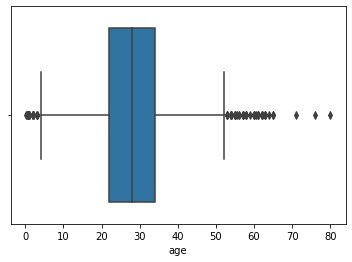

In [100]:
sns.boxplot(x = 'age', orient = 'horizontal', data = dataTrain)

In [0]:
def transform(x):
  if x<5:
    out = 5
  elif x>50:
    out = 50
  else:
    out = x
  return out

dataTrain['age'] = dataTrain['age'].apply(transform)


In [0]:
dataTest['age'] = dataTest['age'].apply(transform)

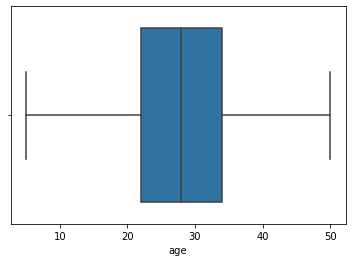

In [103]:
sns.boxplot(x = 'age', orient = 'horizontal', data = dataTrain)

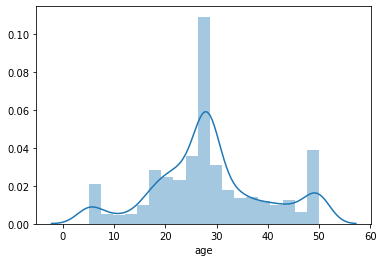

In [104]:
sns.distplot(dataTrain['age'])

## sibsp visualization (insight) and transforrmation

In [105]:
dataTrain['sibsp'].value_counts()

0.0    605
1.0    233
2.0     33
4.0     17
3.0     17
8.0      7
5.0      4
Name: sibsp, dtype: int64

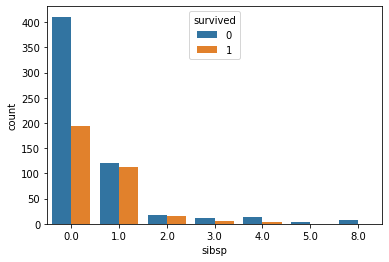

In [106]:
sns.countplot(x = 'sibsp', hue = 'survived', data = dataTrain)

In [0]:
def transform_sib(x):
  if x in [2.0,3.0,4.0,5.0,8.0]:
    out = 1.0
  else:
    out = x
  return out

dataTrain['sibsp'] = dataTrain['sibsp'].apply(transform_sib)
dataTest['sibsp'] = dataTest['sibsp'].apply(transform_sib)

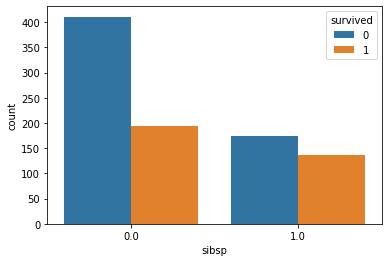

In [108]:
sns.countplot(x = 'sibsp', hue = 'survived', data = dataTrain)

## parch visualization (insight) and transformation

In [109]:
dataTrain['parch'].value_counts()

0.0    705
1.0    115
2.0     78
3.0      6
5.0      5
4.0      4
9.0      2
6.0      1
Name: parch, dtype: int64

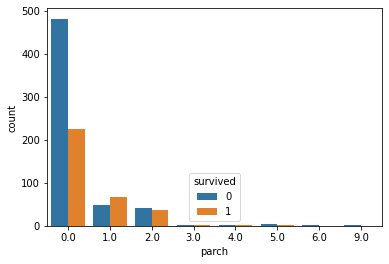

In [110]:
sns.countplot(x = 'parch', hue = 'survived', data = dataTrain)

In [0]:
def transform_parch(x):
  if x in [2.0,3.0,4.0,5.0,6.0,9.0]:
    out = 1.0
  else:
    out = x
  return out

dataTrain['parch'] = dataTrain['parch'].apply(transform_parch)
dataTest['parch'] = dataTest['parch'].apply(transform_parch)

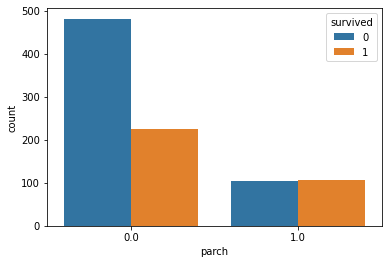

In [112]:
sns.countplot(x = 'parch', hue = 'survived', data = dataTrain)

## fare visualization (insight) and transformation

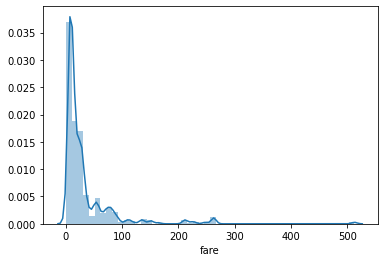

In [113]:
sns.distplot(dataTrain['fare'])

## embarked visualization (insight) and transformation

In [114]:
dataTrain['embarked'].value_counts()

S    638
C    187
Q     90
Name: embarked, dtype: int64

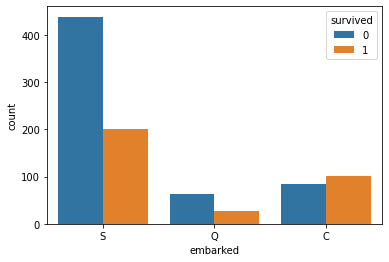

In [115]:
sns.countplot(x = 'embarked', hue = 'survived', data = dataTrain)

In [0]:
dataTrain = pd.get_dummies(dataTrain, columns = ['embarked']) #one hot encode the train data
dataTest = pd.get_dummies(dataTest, columns = ['embarked']) #one hot encode the test data

# Modelling

In [117]:
dataTrain.head()

,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3.0,28.0,0.0,0.0,8.6625,0,0,1,0,0,1
1,3.0,26.0,0.0,0.0,7.8958,0,0,1,0,0,1
2,2.0,19.0,0.0,0.0,26.0000,1,1,0,0,0,1
3,3.0,28.0,1.0,1.0,69.5500,0,1,0,0,0,1
4,3.0,28.0,0.0,0.0,7.7750,0,1,0,0,0,1


In [118]:
dataTest.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3.0,35.0,0.0,0.0,7.1250,0,1,0,0,1
1,3.0,20.0,1.0,1.0,15.7417,0,1,1,0,0
2,3.0,28.0,0.0,0.0,7.8958,0,1,0,0,1
3,3.0,28.0,0.0,0.0,8.0500,0,1,0,0,1
4,3.0,28.0,0.0,0.0,7.7500,0,1,0,1,0


In [119]:
y = dataTrain['survived']
x = dataTrain.drop('survived', axis =1)
x.shape, y.shape

((916, 10), (916,))

In [120]:
# Normalize/ standardize the data
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
stdscale = MinMaxScaler()
x_new = stdscale.fit_transform(x)
testd = stdscale.transform(dataTest)
x_new.shape, testd.shape

((916, 10), (393, 10))

In [121]:
X = pd.DataFrame(x_new, columns = x.columns)
testData = pd.DataFrame(testd, columns = dataTest.columns)
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,0.511111,0.0,0.0,0.016908,0.0,1.0,0.0,0.0,1.0
1,1.0,0.466667,0.0,0.0,0.015412,0.0,1.0,0.0,0.0,1.0
2,0.5,0.311111,0.0,0.0,0.050749,1.0,0.0,0.0,0.0,1.0
3,1.0,0.511111,1.0,1.0,0.135753,1.0,0.0,0.0,0.0,1.0
4,1.0,0.511111,0.0,0.0,0.015176,1.0,0.0,0.0,0.0,1.0


In [122]:
testData.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,0.666667,0.0,0.0,0.013907,0.0,1.0,0.0,0.0,1.0
1,1.0,0.333333,1.0,1.0,0.030726,0.0,1.0,1.0,0.0,0.0
2,1.0,0.511111,0.0,0.0,0.015412,0.0,1.0,0.0,0.0,1.0
3,1.0,0.511111,0.0,0.0,0.015713,0.0,1.0,0.0,0.0,1.0
4,1.0,0.511111,0.0,0.0,0.015127,0.0,1.0,0.0,1.0,0.0


In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
x_train.shape, y_train.shape

((824, 10), (824,))

## Model setup

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score


lr = LogisticRegression()
rand = RandomForestClassifier()
gbr = GradientBoostingClassifier()


In [125]:
x_train.describe()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
count,824.000000,824.000000,824.000000,824.000000,823.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.659587,0.517017,0.342233,0.228155,0.064573,0.353155,0.646845,0.195388,0.099515,0.705097
std,0.418677,0.240196,0.474745,0.419898,0.099323,0.478241,0.478241,0.396740,0.299533,0.456276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.377778,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.511111,0.000000,0.000000,0.029343,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.622222,1.000000,0.000000,0.060776,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
np.unique(y_train)

array([0, 1])

In [127]:
for i in  x_train.columns:
  x_train[i].fillna(x_train[i].median(), inplace = True)

for i in  x_test.columns:
  x_test[i].fillna(x_test[i].median(), inplace = True)

for i in  testData.columns:
  testData[i].fillna(testData[i].median(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Logistic Regression model

In [128]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.7851941747572816

In [129]:
pred = lr.predict(x_test)
print('accuracy_score for logistic is: ', accuracy_score(y_test, pred))
print('f1_score for logistic is: ', f1_score(y_test, pred))
print('precision for logistic is : ', precision_score(y_test, pred))
print('recall score for logistic is: ', recall_score(y_test, pred))


accuracy_score for logistic is:  0.7934782608695652
f1_score for logistic is:  0.7164179104477612
precision for logistic is :  0.75
recall score for logistic is:  0.6857142857142857


In [0]:
# prediction on test data
final_prediction = lr.predict(testData)

dict_data = {}
dict_data['passenger_ID'] = passengerid
dict_data['survived'] = final_prediction
frame = pd.DataFrame(dict_data)
frame.to_csv('log_submission.csv', index = False)

## random forest model

In [132]:
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
rand.score(x_train, y_train)

0.970873786407767

In [133]:
pred = rand.predict(x_test)
print('accuracy_score for random forest is: ', accuracy_score(y_test, pred))
print('f1_score for random forest is: ', f1_score(y_test, pred))
print('precision for random forest is : ', precision_score(y_test, pred))
print('recall score for random forest is: ', recall_score(y_test, pred))


accuracy_score for random forest is:  0.7934782608695652
f1_score for random forest is:  0.7164179104477612
precision for random forest is :  0.75
recall score for random forest is:  0.6857142857142857


In [0]:
# prediction on test data
final_prediction = rand.predict(testData)

dict_data = {}
dict_data['passenger_ID'] = passengerid
dict_data['survived'] = final_prediction
frame = pd.DataFrame(dict_data)
frame.to_csv('rand_submission.csv', index = False)

## Gradient boosting classifier

In [136]:
gbr = GradientBoostingClassifier()
gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)

0.8774271844660194

In [137]:
pred = gbr.predict(x_test)
print('accuracy_score for gradient boost is: ', accuracy_score(y_test, pred))
print('f1_score for gradient boost is: ', f1_score(y_test, pred))
print('precision for gradient boost is : ', precision_score(y_test, pred))
print('recall score for gradient boost is: ', recall_score(y_test, pred))


accuracy_score for gradient boost is:  0.8043478260869565
f1_score for gradient boost is:  0.71875
precision for gradient boost is :  0.7931034482758621
recall score for gradient boost is:  0.6571428571428571


In [0]:
# prediction on test data
final_prediction = gbr.predict(testData)

dict_data = {}
dict_data['passenger_ID'] = passengerid
dict_data['survived'] = final_prediction
frame = pd.DataFrame(dict_data)
frame.to_csv('gbr_submission.csv', index = False)